In [0]:
from __future__ import absolute_import,division, print_function
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.logging.set_verbosity(tf.logging.ERROR)

In [116]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"imadahmad104","key":"b7deb1fb4be6845a6ec335f31e40e511"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [66]:
rm -R evaluation.zip

rm: cannot remove 'evaluation.zip': No such file or directory


In [67]:
!kaggle datasets download -d tongpython/cat-and-dog


 97% 209M/217M [00:04<00:00, 59.0MB/s]
100% 217M/217M [00:04<00:00, 49.0MB/s]


In [0]:
train_cats_dir = os.path.join('training_set', 'cats')
test_cats_dir = os.path.join("test_set", 'cats')
train_dogs_dir = os.path.join('training_set', 'dogs')  # directory with our validation cat pictures
test_dogs_dir = os.path.join('test_set', 'dogs')

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(test_cats_dir))
num_dogs_val = len(os.listdir(test_dogs_dir))

In [0]:
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [0]:
BATCH_SIZE=100
IMAGE_SHAPE = 150

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


In [130]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='training_set',
                                               shuffle=True,
                                               target_size=(IMAGE_SHAPE,IMAGE_SHAPE))

Found 8005 images belonging to 2 classes.


In [131]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory="test_set",
                                               shuffle=True,
                                               target_size=(IMAGE_SHAPE, IMAGE_SHAPE))

Found 2023 images belonging to 2 classes.


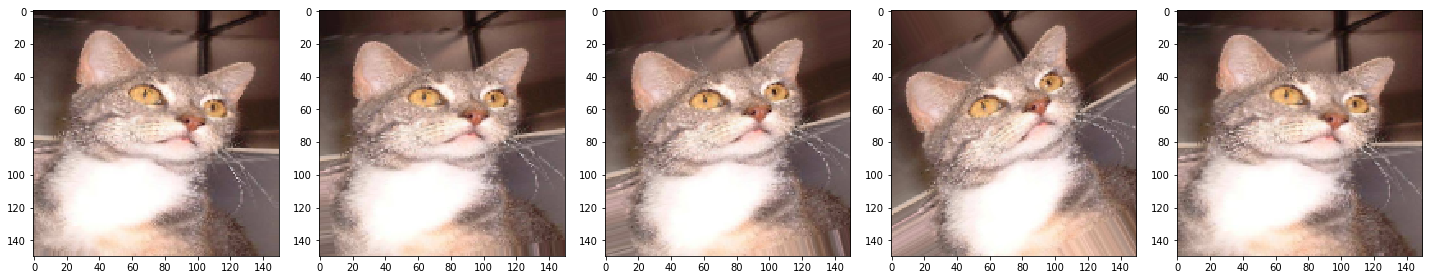

In [132]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

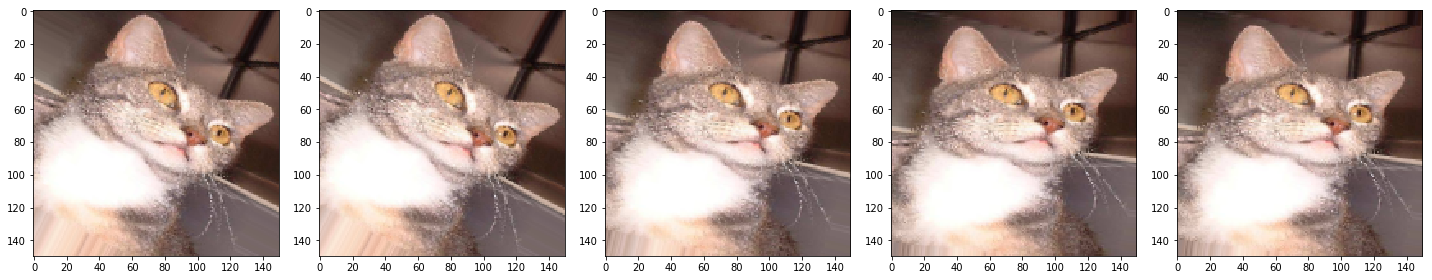

In [133]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [135]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory='training_set',
                                                     shuffle=True,
                                                     target_size=(IMAGE_SHAPE,IMAGE_SHAPE),
                                                     class_mode='binary')

Found 8005 images belonging to 2 classes.


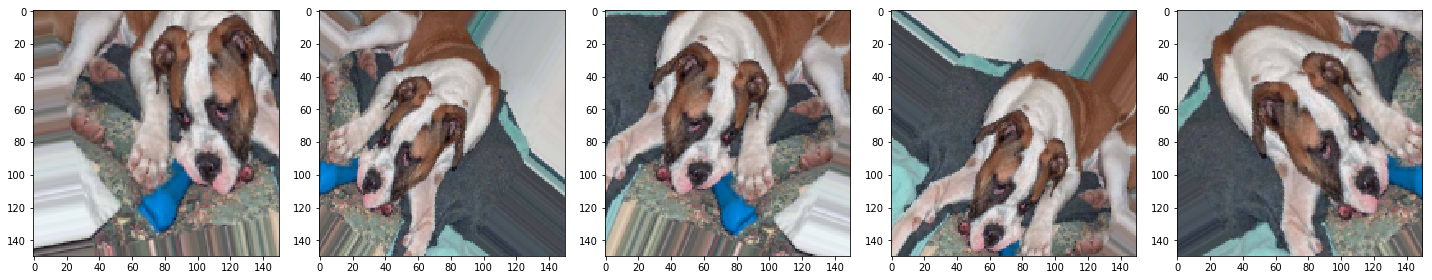

In [136]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [139]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory='test_set',
                                                 target_size=(IMAGE_SHAPE, IMAGE_SHAPE),
                                                 class_mode='binary')

Found 2023 images belonging to 2 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [142]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [143]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
81/81 [==============================] - 78s 965ms/step - loss: 0.6972 - acc: 0.4999 - val_loss: 0.6847 - val_acc: 0.5695
Epoch 2/100
81/81 [==============================] - 69s 856ms/step - loss: 0.6755 - acc: 0.5604 - val_loss: 0.6536 - val_acc: 0.6070
Epoch 3/100
81/81 [==============================] - 69s 846ms/step - loss: 0.6626 - acc: 0.5823 - val_loss: 0.6833 - val_acc: 0.5779
Epoch 4/100
81/81 [==============================] - 68s 842ms/step - loss: 0.6723 - acc: 0.5899 - val_loss: 0.6678 - val_acc: 0.5863
Epoch 5/100
81/81 [==============================] - 67s 829ms/step - loss: 0.6489 - acc: 0.6210 - val_loss: 0.6356 - val_acc: 0.6431
Epoch 6/100
81/81 [==============================] - 67s 824ms/step - loss: 0.6388 - acc: 0.6325 - val_loss: 0.7538 - val_acc: 0.5724
Epoch 7/100
81/81 [==============================] - 66s 820ms/step - loss: 0.6280 - acc: 0.6440 - val_loss: 0.6032 - val_acc: 0.6713
Epoch 8/100
81/81 [==============================] - 66s 819ms

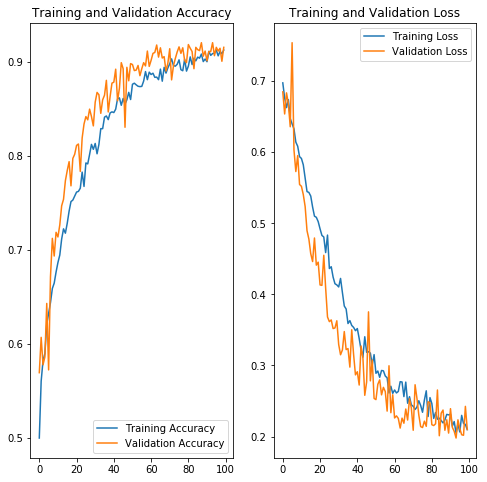

In [144]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
model.save("abc.hd5")